In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
data = pd.read_csv('Mall_Customers.csv')

In [3]:
# Preview the dataset
print(data.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:
# Select relevant features (Annual Income and Spending Score)
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [5]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Create and fit the model
aff_prop = AffinityPropagation(random_state=0)
aff_prop.fit(X_scaled)

AffinityPropagation(random_state=0)

In [7]:
# Get cluster centers and labels
cluster_centers_indices = aff_prop.cluster_centers_indices_
labels = aff_prop.labels_

In [8]:
# Print the results
print("Cluster centers:", X_scaled[cluster_centers_indices])
print("Labels:", labels)

Cluster centers: [[-1.3573049  -1.75473454]
 [-1.24279661  1.23452563]
 [-1.24279661 -0.7065524 ]
 [-0.55574689  0.03105725]
 [-0.02137488  0.06987881]
 [ 0.24581112 -0.39597992]
 [ 0.62750542 -1.48298362]
 [ 0.66567484  1.54509812]
 [ 0.66567484  0.88513158]
 [ 1.61991057  1.35099031]
 [ 1.61991057 -1.05594645]]
Labels: [ 2  1  0  1  2  1  0  1  0  1  0  1  0  1  0  1  2  1  2  1  2  1  0  1
  0  1  2  3  2  1  0  1  0  1  0  1  0  1  2  1  2  1  2  3  2  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  5  4  5  5  4
  4  4  5  4  5  4  4  4  4  5  4  4  5  4  4  4  5  5  4  4  5  4  5  4
  4  5  4  7  5  8  5  7  6  8  6  8  5  8  6  7  6  8  6  8  6  7  5  7
  6  7  5  8  6  7  6  7  6  8  6  7  6  8  6  8  5  7  6  7  6  8  6  7
 10  8  6  8  6  7  6  7  6  8 10  9 10  9 10  9 10  9 10  9 10  9 10  9
 10  9 10  9 10  9 10  9]


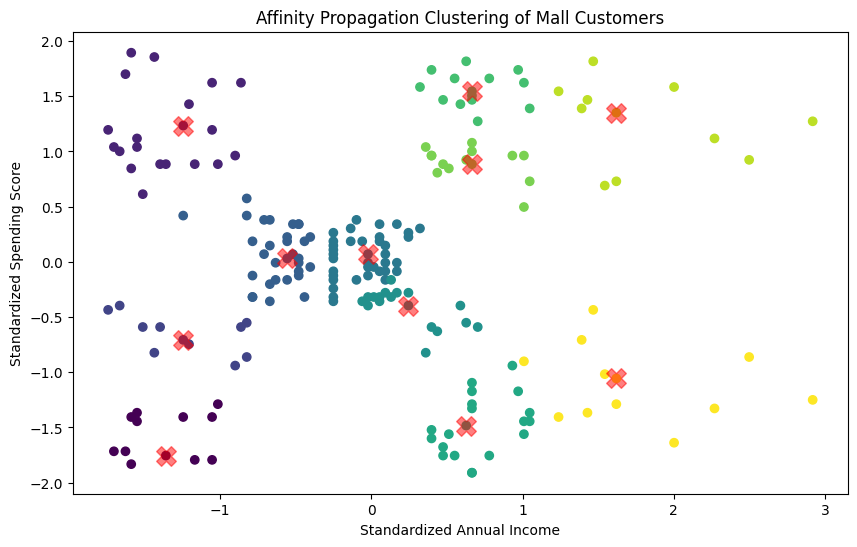

In [9]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', marker='o')
plt.scatter(X_scaled[cluster_centers_indices, 0], X_scaled[cluster_centers_indices, 1], 
            c='red', s=200, alpha=0.5, marker='X')  # Mark cluster centers
plt.title("Affinity Propagation Clustering of Mall Customers")
plt.xlabel("Standardized Annual Income")
plt.ylabel("Standardized Spending Score")
plt.show()